In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
from pandas import Timestamp
import csv
#from helferlein_thomas import files
#from firesfromSpace import date_seperating 
from scipy.stats import poisson
from scipy.stats import expon
import folium
from IPython.display import HTML, display

In [151]:
m6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')

In [152]:
#nrtmodis = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')

In [153]:
rain = pd.read_csv(r'..\Data\Clean\rain.csv')

In [154]:
wind = pd.read_csv(r'..\Data\Clean\wind.csv')

In [155]:
weather = pd.read_csv(r'..\Data\Clean\cweather.csv')

In [156]:
import os
os.getcwd()

'D:\\Dokumente\\GitHub\\AustralienFiresFromSpace_Schoeggl_Vorauer\\Notebooks'

In [157]:
def datetime(df):
    '''spalte acq_date als Datetime auszeichnen'''
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    return df 

In [158]:
weather_dated = datetime(weather)

In [159]:
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    '''definiert die wochen aller dataframes akurat; wochenbeginn montag, datum correct'''
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [160]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude',
       'Month'],
      dtype='object')

In [161]:
weat_timesel = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm'])

In [162]:
weat_time_temp = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp',])

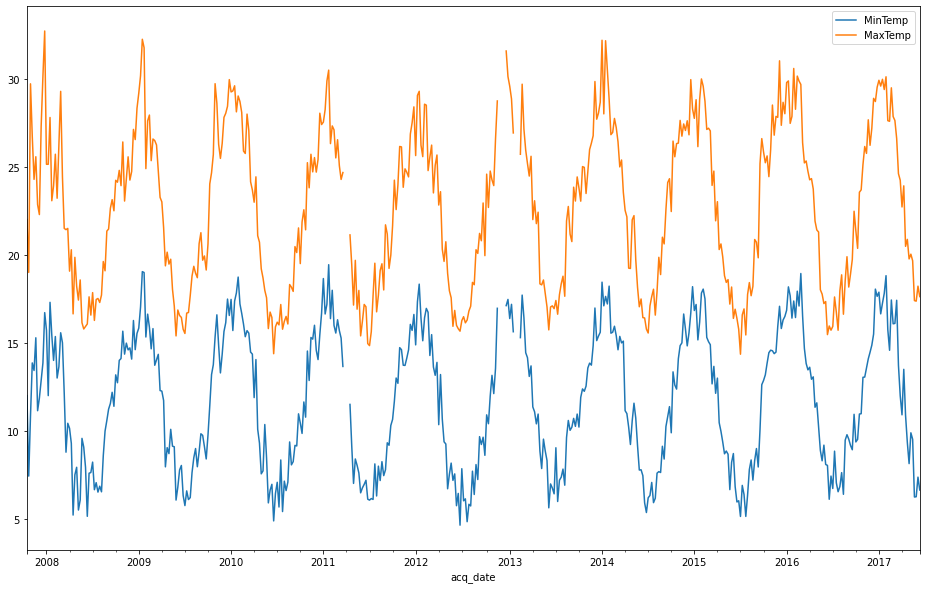

In [163]:
weat_time_temp.set_index('acq_date').plot(figsize=(16,10))

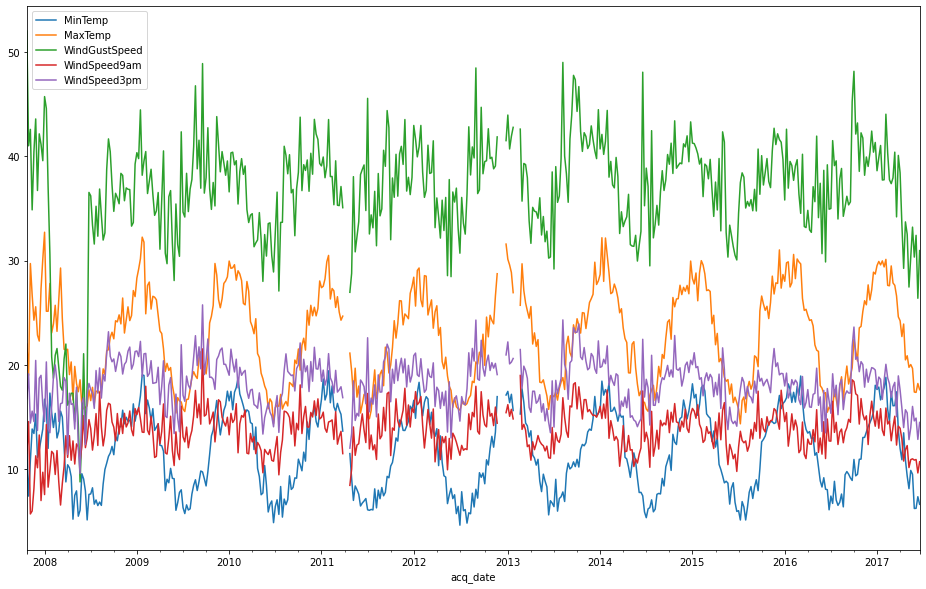

In [164]:
weat_timesel.set_index('acq_date').plot(figsize=(16,10))

In [165]:
def date_seperating(df, sel): 
    '''splits dataframes into weeks, months, years'''
    out = []
    if 'D' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))])
    if 'W' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))])
    if 'M' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))])
    if 'Y' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
    return out 
    # return ([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))],
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))], 
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))],
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
#weeks, month, year = date_seperating(weather, 'W')


In [166]:
weeks, month, year = date_seperating(weather, 'W M Y')
week0 = weeks[0]

#weather_days =[g for n, g in weather.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))]
#weather_weeks =[g for n, g in weather.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))]

In [167]:
#trennt eine woche in tage
weat_weeks_temp = timeselect(weeks[5], freq='D', fct='mean', columns = ['MinTemp', 'MaxTemp'])

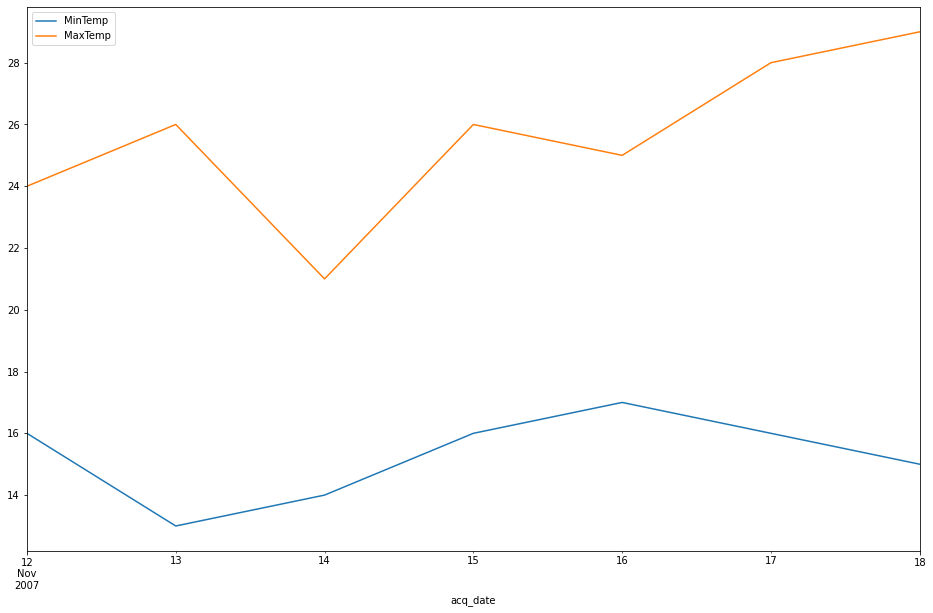

In [168]:
weat_weeks_temp.set_index('acq_date').plot(figsize=(16,10))

In [169]:
#trennt ein jahr in wochen
weat_year_temp = timeselect(year[1], freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp'])

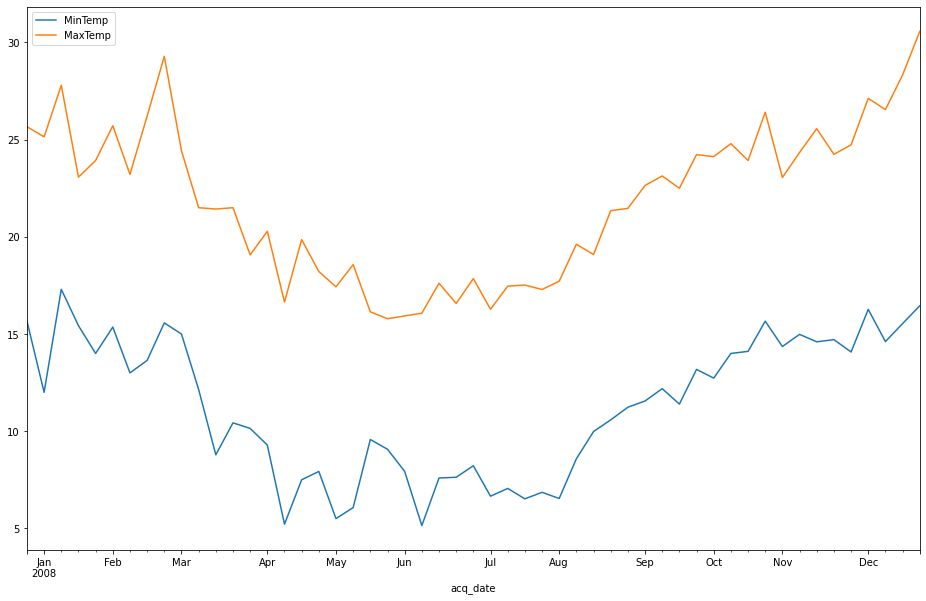

In [170]:
weat_year_temp.set_index('acq_date').plot(figsize=(16,10))

In [171]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude',
       'Month'],
      dtype='object')

In [172]:
weather.MaxTemp.max()

48.0

plt.plot(weather.set_index('acq_date'))

In [173]:
weather['acq_date'] = pd.to_datetime(weather['acq_date'])
dfww = weather.groupby([pd.Grouper(key='acq_date', freq='D')])[['MaxTemp','WindGustSpeed', 'WindGustDir']].mean().reset_index().sort_values('acq_date')

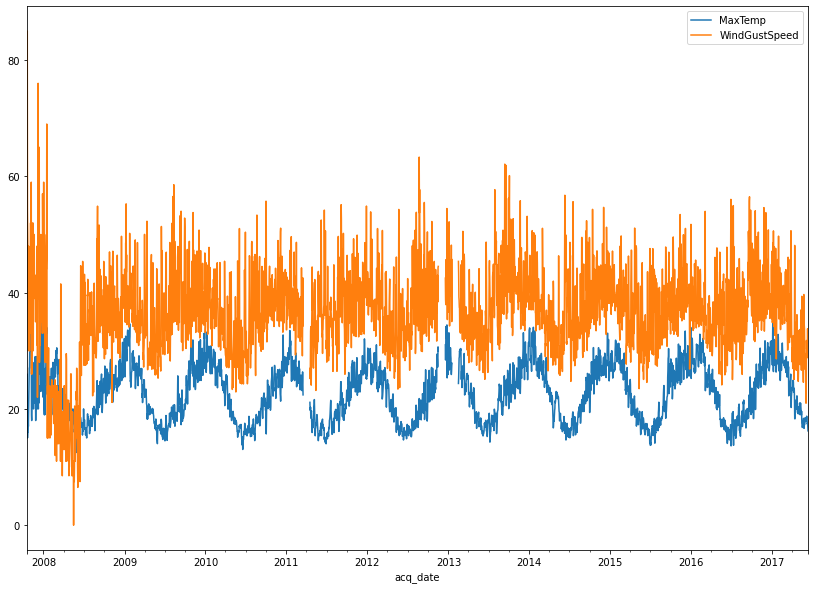

In [174]:
dfww.set_index('acq_date').plot(figsize = (14,10))

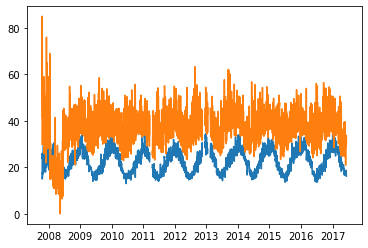

In [175]:
plt.plot(dfww.set_index('acq_date'))

In [176]:
sum(weather.isnull().values.ravel())

0

In [177]:
sum([True for idx,row in weather.iterrows() if any(row.isnull())])

0

In [178]:
weather.isna().sum()

acq_date         0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
latitude         0
longitude        0
Month            0
dtype: int64

In [179]:
weather.isna().sum().sum()

0

In [180]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude',
       'Month'],
      dtype='object')

In [193]:
#Create a map
#braucht abhängigkeit dass radius sich mit ändert - 2tes tool zur kombination?
f = folium.Figure(width=1000, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,weeks[42].shape[0]):    
    location=[weeks[42].iloc[i]['latitude'], weeks[42].iloc[i]['longitude']]
    folium.CircleMarker(location,radius=weeks[42].WindGustSpeed.sum() ,color='red').add_to(m)

display(m)


In [149]:
weat_weeks_temp

,acq_date,MinTemp,MaxTemp
0,2007-11-12,16.6,24.2
1,2007-11-13,13.3,26.5
2,2007-11-14,14.5,21.8
3,2007-11-15,16.3,26.8
4,2007-11-16,17.2,25.8
5,2007-11-17,16.5,28.2
6,2007-11-18,15.0,29.4


In [185]:
weeks[42]

,acq_date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,latitude,longitude,Month
0,2008-08-04,Sydney,5.0,15.0,0.0,3.4,W,0.0,W,SSW,...,1021.2,6.0,7.0,9.0,15.0,No,No,-33.854816,151.216454,8
1,2008-08-04,Canberra,-3.0,12.0,0.0,3.0,SSE,48.0,NNW,WNW,...,1021.8,6.0,7.0,1.0,11.0,No,No,-35.297591,149.101268,8
2,2008-08-04,Melbourne,6.0,14.0,0.4,1.4,SW,41.0,W,SW,...,1025.9,6.0,6.0,8.0,13.0,No,No,-37.814218,144.963161,8
3,2008-08-04,Brisbane,8.0,16.0,0.0,3.8,WNW,19.0,SW,SSE,...,1022.8,8.0,8.0,12.0,16.0,No,No,-27.468968,153.023499,8
4,2008-08-04,Adelaide,5.0,14.0,0.0,4.6,WSW,30.0,0,SW,...,1030.8,0.0,0.0,10.0,13.0,No,No,-34.928180,138.599931,8
5,2008-08-04,Perth,1.0,22.0,0.0,3.8,NNW,39.0,NNE,WNW,...,1025.8,0.0,3.0,13.0,22.0,No,No,-31.952712,115.860480,8
6,2008-08-04,Hobart,1.0,13.0,1.0,0.2,N,56.0,N,NNW,...,1018.2,2.0,4.0,6.0,12.0,No,No,-42.882509,147.328123,8
7,2008-08-04,Darwin,18.0,30.0,0.0,9.2,SE,46.0,SE,SE,...,1014.7,2.0,1.0,21.0,29.0,No,No,-12.460440,130.841047,8
8,2008-08-05,Sydney,5.0,17.0,0.6,1.8,W,0.0,W,ENE,...,1025.4,1.0,5.0,9.0,17.0,No,No,-33.854816,151.216454,8
9,2008-08-05,Canberra,-5.0,13.0,0.0,2.2,NW,33.0,N,NNW,...,1025.6,6.0,6.0,0.0,12.0,No,No,-35.297591,149.101268,8


In [ ]:
df.corr
df.corrwith